In [4]:
getwd()
library("data.table")
library("stm")
yle <- fread("/work/cloud-user/russia_finland/finland_russia/data/processed/yle_fi_lemmas_new.csv")



[1] "/work/cloud-user/russia_finland/finland_russia"

stm v1.3.3 (2018-1-26) successfully loaded. See ?stm for help. 
 Papers, resources, and other materials at structuraltopicmodel.com


In [5]:
head(yle)

id
1 0 
2 1 
3 2 
4 3 
5 4 
6 5 
  headline                                                                        
1 Kaukasian konflikti: Aseissa Georgia ja Venäjän tukemat Etelä-Ossetia ja Abhasia
2 Otteita Venäjän-tuntijoiden vastauksista                                        
3 Etelä-Ossetian ruutitynnyri räjähti viimein                                     
4 Yle Uutiset seuraa Ukrainan kriisiä hetki hetkeltä                              
5 Saksan ulkopolitiikan täyskäännös                                               
6 Viennin rasvatahra: käsikirjoitus                                               
  content                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

ERROR: Error in head(integrumreg): object 'integrumreg' not found


In [7]:
##remove columns to make the file thinner
yle_id_year_lemma <- yle[,c("year", "lemmas_content")]

In [8]:
articlesyle <- as.data.frame(yle_id_year_lemma)


In [9]:
head(articlesyle)

year
1 2008
2 2007
3 2008
4 2014
5 2014
6 1998
  lemmas_content                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [11]:
library("tm")
darianstopwords <- c(stopwords("finnish"), "\n", "quot","nbsp","/n", 
                     "id", "html", "yle", "fi", "www", "http", "www.yle")

In [12]:
library("stm")

In [13]:
yle_processed2 <- textProcessor(
  articlesyle$lemmas_content, 
  metadata = articlesyle,
  stem=FALSE,
  customstopwords = darianstopwords)


Building corpus... 
Converting to Lower Case... 
Removing punctuation... 
Removing stopwords... 
Remove Custom Stopwords...
Removing numbers... 
Creating Output... 


In [ ]:
saveRDS(yle_processed2, "processed_yle2.rds")

In [14]:
yle_out2 <- prepDocuments(
  yle_processed2$documents, 
  yle_processed2$vocab,
  yle_processed2$meta,
  lower.thresh = 15)


Removing 280853 of 314617 terms (761130 of 8499811 tokens) due to frequency 
Your corpus now has 68472 documents, 33764 terms and 7738681 tokens.

In [ ]:
saveRDS(yle_out2, "out_yle2.rds")

In [15]:
ls()

[1] "articlesyle"       "darianstopwords"   "yle"              
[4] "yle_id_year_lemma" "yle_out2"          "yle_processed1"

In [16]:
yle_model_fit2 <- stm(
  yle_out2$documents, 
  yle_out2$vocab, 
  K = 30,
  prevalence =~ year, 
  max.em.its = 100,
  data = yle_out2$meta, 
  init.type = "Spectral")


Beginning Spectral Initialization 
	 Calculating the gram matrix...
	 Using only 10000 most frequent terms during initialization...
	 Finding anchor words...
 	..............................
	 Recovering initialization...
 	....................................................................................................
Initialization complete.
....................................................................................................
Completed E-Step (99 seconds). 
Completed M-Step. 
Completing Iteration 1 (approx. per word bound = -8.627) 
....................................................................................................
Completed E-Step (100 seconds). 
Completed M-Step. 
Completing Iteration 2 (approx. per word bound = -7.819, relative change = 9.366e-02) 
....................................................................................................
Completed E-Step (89 seconds). 
Completed M-Step. 
Completing Iteration 3 (approx. per word bound =

In [ ]:
saveRDS(yle_model_fit2, "STMyle302.rds")

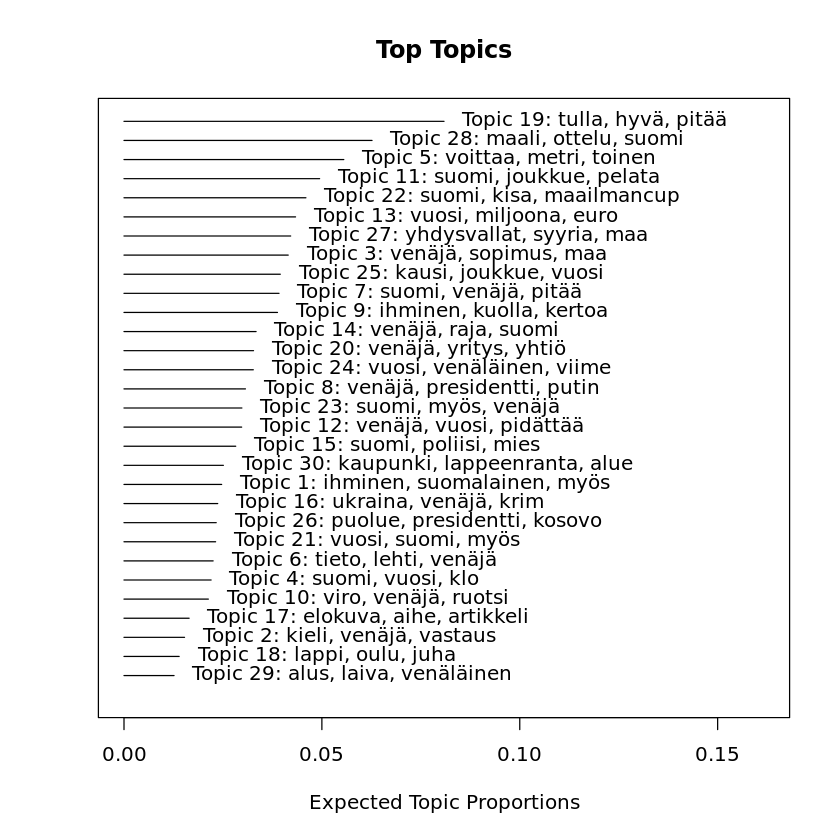

In [17]:
plot(yle_model_fit2, "summary")

In [19]:
labelTopics(yle_model_fit2, topics = NULL, n = 10, frexweight = 0.8)

Topic 1 Top Words:
 	 Highest Prob: ihminen, suomalainen, myös, toinen, suomi, elää, kaikki, nainen, vuosi, vain 
 	 FREX: sana, voi, elämä, sauna, arki, attempt, moodle, juoda, ystävä, isä 
 	 Lift: lesso, verbi, attempt, moodle, alkuruoka, blini, hauduttaa, kastike, konsonantti, kulho 
 	 Score: moodle, attempt, sota, ihminen, lapsi, nainen, kirja, äiti, kulttuuri, isä 
Topic 2 Top Words:
 	 Highest Prob: kieli, venäjä, vastaus, kysymys, koulu, tehtävä, ruotsi, suomi, opiskelija, myös 
 	 FREX: lähettäjä, kieli, opiskelu, maahanmuuttaja, koulu, opiskelija, vastaus, oppilas, opetus, opiskella 
 	 Lift: ammattiopinnot, esiopetus, fynd, jolkkonen, kieliohjelma, koulutodistus, koulutuskuntayhtymä, koulutussuunnittelija, monivalintatehtävä, opiskelu 
 	 Score: kieli, lähettäjä, koulu, maahanmuuttaja, oppilas, vastaus, opiskelija, opiskelu, tehtävänumero, lukio 
Topic 3 Top Words:
 	 Highest Prob: venäjä, sopimus, maa, georgia, nato, eurooppa, yhdysvallat, ulkoministeri, sanoa, pakote 
 	 

In [20]:
##
yle_prep2 <- estimateEffect(1:30 ~ s(year), yle_model_fit2,meta = yle_out2$meta, uncertainty = "Global")

In [27]:
saveRDS(yle_prep2, "prepYle2.rds")

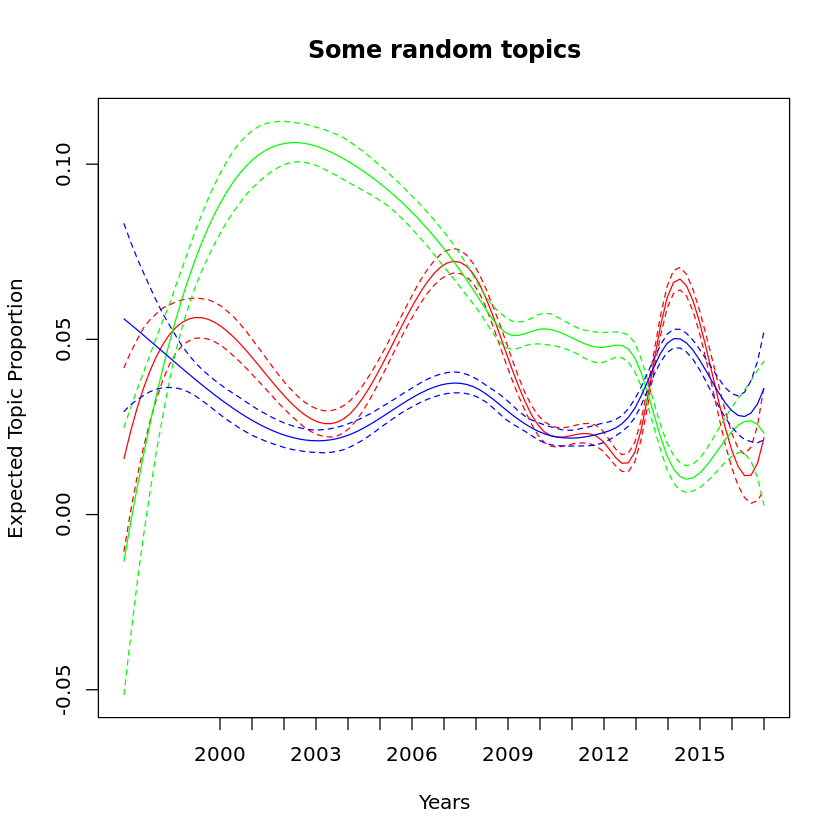

In [21]:


##
plot(
  yle_prep2, "year", 
  method = "continuous", 
  topics = c(3, 5, 8), 
  printlegend = FALSE,
  xaxt = "n",
  xlab = "Years",
  main = "Some random topics")
axis(1,at=seq(from=2000, to=2017,by=1))

In [ ]:
#regional_model_fitKn <- stm(regional_out$documents, regional_out$vocab, K = 0, 
                   prevalence =~ year, max.em.its = 100, data = regional_out$meta, init.type = "Spectral")
#saveRDS(regional_model_fitKn, "STMregn.rds")


In [24]:
## table with topic-to-documnt
yle302dt <- make.dt(yle_model_fit2, meta = NULL)

In [26]:
saveRDS(yle302dt, "document_topic_yle2.rds")

In [73]:
library("wordcloud")
cloud(model.fit, topic=4)

ERROR: Error in library("wordcloud"): there is no package called ‘wordcloud’


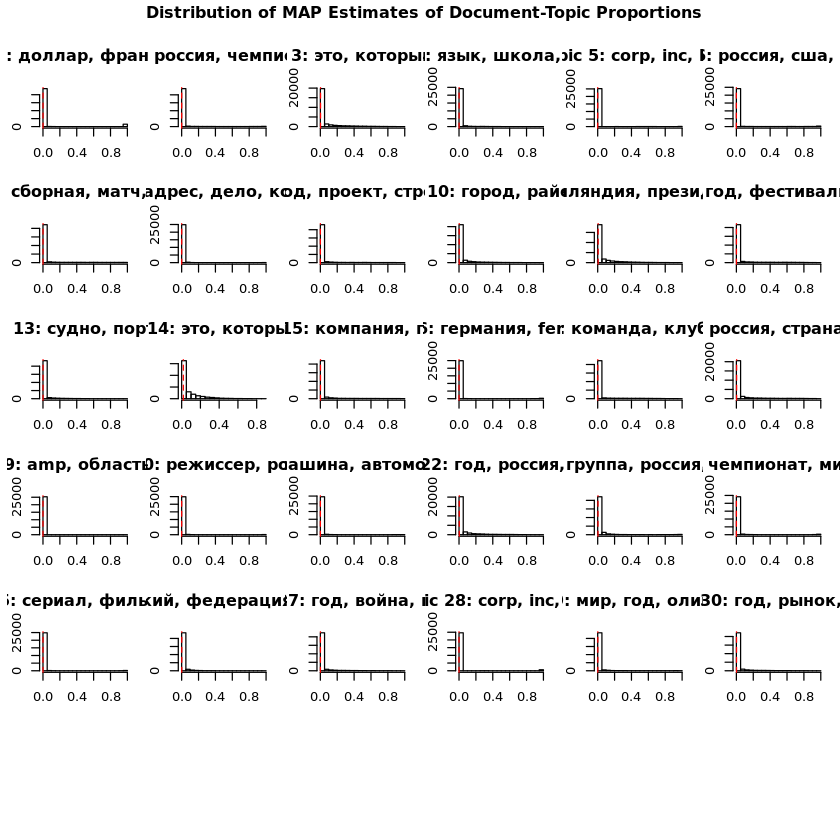